In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import sklearn
from sklearn import tree
from sklearn.metrics import accuracy_score

In [2]:
frame = pd.DataFrame(columns = ["min_impurity_decrease", "NodeCount", "TrainAcc", "TestAcc"])

In [3]:
train_df = pd.read_csv("CalHouseTrain.csv", index_col=0)
test_df = pd.read_csv("CalHouseTest.csv", index_col=0)

In [4]:
x_train = train_df.drop('class', axis=1)
y_test = test_df.drop('class', axis=1)

In [5]:
test_df['class']

1000    average
1001    average
1002    average
1003        low
1004        low
         ...   
1495       high
1496    average
1497        low
1498        low
1499    average
Name: class, Length: 500, dtype: object

In [5]:
from sklearn.tree import DecisionTreeClassifier
# TODO: replace by your own python code
y_train_pred = []
y_test_pred = []
frame2 = pd.DataFrame(columns = ["min_impurity_decrease", "NodeCount", "TrainAcc", "TestAcc"])
for i in range(1000):
    clf = tree.DecisionTreeClassifier(random_state=0,min_impurity_decrease= i*0.001)
    clf.fit(x_train,train_df['class']) 
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(y_test)
    
    number_nodes = clf.tree_.node_count 
    training_accuracy = accuracy_score(y_train_pred,train_df['class'])
    test_accuracy = accuracy_score(y_test_pred,test_df['class'])  
    frame2.loc[i] = [i*0.001, number_nodes,training_accuracy, test_accuracy]
    


In [6]:
pd.set_option('display.max_rows', 3000)

In [7]:
frame2

,min_impurity_decrease,NodeCount,TrainAcc,TestAcc
0,0.000,431.0,1.000,0.644
1,0.001,337.0,0.971,0.644
2,0.002,125.0,0.854,0.664
3,0.003,65.0,0.784,0.668
4,0.004,41.0,0.755,0.652
5,0.005,31.0,0.746,0.662
6,0.006,25.0,0.732,0.654
7,0.007,23.0,0.728,0.650
8,0.008,21.0,0.724,0.652
9,0.009,21.0,0.724,0.652


In [8]:
frame2['TestAcc'].max()

0.668

In [9]:
frame2['TestAcc'].min()

0.422

In [10]:
frame2.loc[40]

min_impurity_decrease    0.040
NodeCount                3.000
TrainAcc                 0.577
TestAcc                  0.558
Name: 40, dtype: float64

In [11]:
selected_models = [0.150,0.040,0.003]
for i in range(3):
    clf = tree.DecisionTreeClassifier(random_state=0,min_impurity_decrease= selected_models[i])
    clf.fit(x_train,train_df['class']) 
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(y_test)
    
    number_nodes = clf.tree_.node_count 
    training_accuracy = accuracy_score(y_train_pred,train_df['class'])
    test_accuracy = accuracy_score(y_test_pred,test_df['class'])  
    frame.loc[i] =[selected_models[i], number_nodes,training_accuracy, test_accuracy]

In [12]:
frame

,min_impurity_decrease,NodeCount,TrainAcc,TestAcc
0,0.150,1.0,0.390,0.422
1,0.040,3.0,0.577,0.558
2,0.003,65.0,0.784,0.668


In [13]:
#Without pruning

In [14]:
frame_no_pruning = pd.DataFrame(columns = ["Frac", "Run", "NodeCount", "TrainAcc", "TestAcc"])

y_train_pred = []
y_test_pred = []
fractions= [0.05,0.1,0.2,0.5,0.99]
# TODO: replace by your own python code
for k in range(5):
    for i in range(100):
        sampled_df = train_df.sample(n=int(1000*fractions[k]),random_state=i,) #Sampling training set  
        x_train = sampled_df.drop('class', axis=1) #Dropping class column 

        clf = tree.DecisionTreeClassifier(random_state=0) #Building tree
        clf.fit(x_train,sampled_df['class'])  #Fiting classifier with 25% of the training dataset

        number_nodes = clf.tree_.node_count 
        y_train_pred = clf.predict(x_train)
        y_test_pred = clf.predict(y_test)

        #Computing training accurracy
        sampled_df = sampled_df.reset_index()
        a=0
        for j in range (len(y_train_pred)):
            if y_train_pred[j] == sampled_df['class'][j]:
                a=a+1
        #Computing test accuracy
        b=0
        for z in range (len(y_test_pred)):
            if y_test_pred[z] == test_df['class'][z+1000]:
                b=b+1             
        #Adding results to the dataframe
        frame_no_pruning.loc[i+100*k]=[fractions[k],i,number_nodes,a/len(y_train_pred),b/len(y_test_pred)]

In [15]:
frame_no_pruning

,Frac,Run,NodeCount,TrainAcc,TestAcc
0,0.05,0.0,27.0,1.0,0.598
1,0.05,1.0,25.0,1.0,0.446
2,0.05,2.0,29.0,1.0,0.528
3,0.05,3.0,29.0,1.0,0.558
4,0.05,4.0,25.0,1.0,0.512
5,0.05,5.0,29.0,1.0,0.476
6,0.05,6.0,25.0,1.0,0.528
7,0.05,7.0,29.0,1.0,0.572
8,0.05,8.0,21.0,1.0,0.626
9,0.05,9.0,23.0,1.0,0.522


In [ ]:
#Ploting results

In [ ]:
#With pruning

In [16]:
frame_with_pruning = pd.DataFrame(columns = ["min_impurity_decrease","Frac", "Run", "NodeCount", "TrainAcc", "TestAcc"])

y_train_pred = []
y_test_pred = []
fractions= [0.05,0.1,0.2,0.5,0.99]
selected_models = [0.150,0.040,0.003]
# TODO: replace by your own python code
for m in range(3):
    for k in range(5):
        for i in range(100):
            sampled_df = train_df.sample(n=int(1000*fractions[k]),random_state=i) #Sampling training set  
            x_train = sampled_df.drop('class', axis=1) #Dropping class column 

            clf = tree.DecisionTreeClassifier(random_state=0,min_impurity_decrease= selected_models[m]) #Building tree
            clf.fit(x_train,sampled_df['class'])  #Fiting classifier with 25% of the training dataset

            number_nodes = clf.tree_.node_count 
            y_train_pred = clf.predict(x_train)
            y_test_pred = clf.predict(y_test)

              #Computing training accurracy
            sampled_df = sampled_df.reset_index()
            a=0
            for j in range (len(y_train_pred)):
                if y_train_pred[j] == sampled_df['class'][j]:
                        a=a+1
            #Computing test accuracy
            b=0
            for z in range (len(y_test_pred)):
                if y_test_pred[z] == test_df['class'][z+1000]:
                        b=b+1            
            #Adding results to the dataframe
            frame_with_pruning.loc[i+100*k+500*m]=[selected_models[m],fractions[k],i,number_nodes,a/len(y_train_pred),b/len(y_test_pred)]
            #Adding results to the dataframe
           

In [17]:
frame_with_pruning

,min_impurity_decrease,Frac,Run,NodeCount,TrainAcc,TestAcc
0,0.150,0.05,0.0,3.0,0.580000,0.550
1,0.150,0.05,1.0,1.0,0.440000,0.262
2,0.150,0.05,2.0,1.0,0.460000,0.422
3,0.150,0.05,3.0,1.0,0.380000,0.316
4,0.150,0.05,4.0,1.0,0.460000,0.422
5,0.150,0.05,5.0,1.0,0.400000,0.422
6,0.150,0.05,6.0,3.0,0.620000,0.562
7,0.150,0.05,7.0,1.0,0.400000,0.422
8,0.150,0.05,8.0,3.0,0.700000,0.554
9,0.150,0.05,9.0,1.0,0.360000,0.316


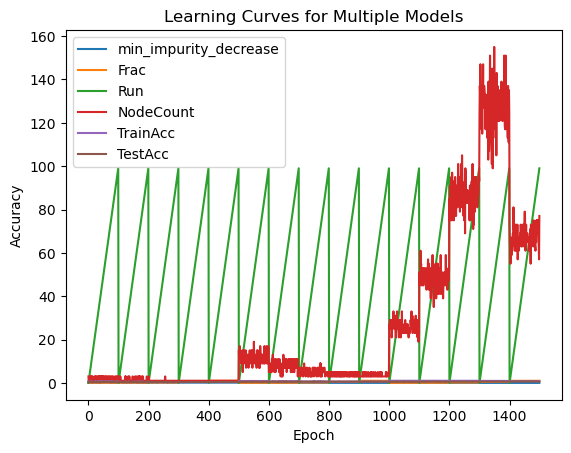

In [18]:
frame_with_pruning.plot.line()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Learning Curves for Multiple Models')
plt.show()

In [ ]:
frame_with_pruning.boxplot(column= 'NodeCount', by='Frac')

In [19]:
max_index = frame_with_pruning['TestAcc'].idxmax()

In [20]:
frame_with_pruning.loc[max_index]

min_impurity_decrease      0.003
Frac                       0.500
Run                        0.000
NodeCount                123.000
TrainAcc                   0.938
TestAcc                    0.716
Name: 1300, dtype: float64

In [21]:
frame_with_pruning = pd.DataFrame(columns = ["min_impurity_decrease","Frac","NodeCount", "TrainAcc", "TestAcc"])

sampled_df = train_df.sample(n=int(1000*0.5),random_state=0) #Sampling training set  
x_train = sampled_df.drop('class', axis=1) #Dropping class column 
y_train_pred = []
y_test_pred = []

clf = tree.DecisionTreeClassifier(random_state=0,min_impurity_decrease= 0.003) #Building tree
clf.fit(x_train,sampled_df['class'])  #Fiting classifier with 25% of the training dataset

number_nodes = clf.tree_.node_count 
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(y_test)

#Computing training accurracy
sampled_df = sampled_df.reset_index()
a=0
for j in range (len(y_train_pred)):
    if y_train_pred[j] == sampled_df['class'][j]:
        a=a+1
#Computing test accuracy
b=0
for z in range (len(y_test_pred)):
    if y_test_pred[z] == test_df['class'][z+1000]:
        b=b+1      
        
frame_with_pruning.loc[0] = [0.003,0.50, number_nodes,a/len(y_train_pred),b/len(y_test_pred)]

In [22]:
frame_with_pruning

,min_impurity_decrease,Frac,NodeCount,TrainAcc,TestAcc
0,0.003,0.5,123.0,0.938,0.716


In [ ]:
#With 50% of training set

In [23]:
frame_with_pruning = pd.DataFrame(columns = ["min_impurity_decrease","Frac","NodeCount", "TrainAcc", "TestAcc"])
for i in range(10):
    

    sampled_df = train_df.sample(n=int(1000*0.5),random_state=0) #Sampling training set  
    x_train = sampled_df.drop('class', axis=1) #Dropping class column 
    y_train_pred = []
    y_test_pred = []

    clf = tree.DecisionTreeClassifier(random_state=0,min_samples_leaf = i+1,min_impurity_decrease= 0.003) #Building tree
    clf.fit(x_train,sampled_df['class'])  #Fiting classifier with 25% of the training dataset

    number_nodes = clf.tree_.node_count 
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(y_test)

    #Computing training accurracy
    sampled_df = sampled_df.reset_index()
    a=0
    for j in range (len(y_train_pred)):
        if y_train_pred[j] == sampled_df['class'][j]:
            a=a+1
    #Computing test accuracy
    b=0
    for z in range (len(y_test_pred)):
        if y_test_pred[z] == test_df['class'][z+1000]:
            b=b+1      

    frame_with_pruning.loc[i] = [0.003,0.50, number_nodes,a/len(y_train_pred),b/len(y_test_pred)]

In [24]:
frame_with_pruning

,min_impurity_decrease,Frac,NodeCount,TrainAcc,TestAcc
0,0.003,0.5,123.0,0.938,0.716
1,0.003,0.5,97.0,0.912,0.708
2,0.003,0.5,83.0,0.888,0.710
3,0.003,0.5,69.0,0.866,0.698
4,0.003,0.5,71.0,0.866,0.704
5,0.003,0.5,65.0,0.848,0.674
6,0.003,0.5,61.0,0.832,0.652
7,0.003,0.5,55.0,0.822,0.678
8,0.003,0.5,53.0,0.806,0.700
9,0.003,0.5,49.0,0.802,0.696


In [28]:
frame_with_pruning = pd.DataFrame(columns = ["min_impurity_decrease", "MinSamplesLeaf","Frac" , "Run", "NodeCount", "TrainAcc", "TestAcc"])

y_train_pred = []
y_test_pred = []
fractions= [1]
selected_models = [0.150,0.040,0.003]
# TODO: replace by your own python code
for m in range(3):
    for k in range(10):
        for i in range(100):
            x_train = train_df.drop('class', axis=1) #Dropping class column 

            clf = tree.DecisionTreeClassifier(random_state=0,min_samples_leaf = k+1,min_impurity_decrease= selected_models[m]) #Building tree
            clf.fit(x_train,train_df['class'])  #Fiting classifier with 25% of the training dataset

            number_nodes = clf.tree_.node_count 
            y_train_pred = clf.predict(x_train)
            y_test_pred = clf.predict(y_test)

              #Computing training accurracy
            training_accuracy = accuracy_score(y_train_pred,train_df['class'])
            #Computing test accuracy
            test_accuracy = accuracy_score(y_test_pred,test_df['class'])           
            #Adding results to the dataframe
            frame_with_pruning.loc[i+100*k+1000*m]=[selected_models[m], k+1 ,fractions[0],i,number_nodes,training_accuracy,test_accuracy]
            #Adding results to the dataframe

In [29]:
frame_with_pruning

,min_impurity_decrease,MinSamplesLeaf,Frac,Run,NodeCount,TrainAcc,TestAcc
0,0.150,1.0,1.0,0.0,1.0,0.390,0.422
1,0.150,1.0,1.0,1.0,1.0,0.390,0.422
2,0.150,1.0,1.0,2.0,1.0,0.390,0.422
3,0.150,1.0,1.0,3.0,1.0,0.390,0.422
4,0.150,1.0,1.0,4.0,1.0,0.390,0.422
5,0.150,1.0,1.0,5.0,1.0,0.390,0.422
6,0.150,1.0,1.0,6.0,1.0,0.390,0.422
7,0.150,1.0,1.0,7.0,1.0,0.390,0.422
8,0.150,1.0,1.0,8.0,1.0,0.390,0.422
9,0.150,1.0,1.0,9.0,1.0,0.390,0.422


In [30]:
max_index = frame_with_pruning['TestAcc'].idxmax()

In [31]:
frame_with_pruning.loc[max_index]

min_impurity_decrease     0.003
MinSamplesLeaf            1.000
Frac                      1.000
Run                       0.000
NodeCount                65.000
TrainAcc                  0.784
TestAcc                   0.668
Name: 2000, dtype: float64

In [33]:
frame_with_pruning = pd.DataFrame(columns = ["min_impurity_decrease", "MinSamplesSplit","Frac" , "Run", "NodeCount", "TrainAcc", "TestAcc"])

y_train_pred = []
y_test_pred = []
fractions= [1]
selected_models = [0.150,0.040,0.003]
# TODO: replace by your own python code
for m in range(3):
    for k in range(100):
        for i in range(100):
            x_train = train_df.drop('class', axis=1) #Dropping class column 

            clf = tree.DecisionTreeClassifier(random_state=i,min_samples_split = k+2,min_impurity_decrease= selected_models[m]) #Building tree
            clf.fit(x_train,train_df['class'])  #Fiting classifier with 25% of the training dataset

            number_nodes = clf.tree_.node_count 
            y_train_pred = clf.predict(x_train)
            y_test_pred = clf.predict(y_test)

              #Computing training accurracy
            training_accuracy = accuracy_score(y_train_pred,train_df['class'])
            #Computing test accuracy
            test_accuracy = accuracy_score(y_test_pred,test_df['class'])           
            #Adding results to the dataframe
            frame_with_pruning.loc[i+100*k+1000*m]=[selected_models[m], k+1 ,fractions[0],i,number_nodes,training_accuracy,test_accuracy]
            #Adding results to the dataframe

In [34]:
frame_with_pruning

,min_impurity_decrease,MinSamplesSplit,Frac,Run,NodeCount,TrainAcc,TestAcc
0,0.150,1.0,1.0,0.0,1.0,0.390,0.422
1,0.150,1.0,1.0,1.0,1.0,0.390,0.422
2,0.150,1.0,1.0,2.0,1.0,0.390,0.422
3,0.150,1.0,1.0,3.0,1.0,0.390,0.422
4,0.150,1.0,1.0,4.0,1.0,0.390,0.422
...,...,...,...,...,...,...,...
11995,0.003,100.0,1.0,95.0,39.0,0.743,0.654
11996,0.003,100.0,1.0,96.0,39.0,0.743,0.654
11997,0.003,100.0,1.0,97.0,39.0,0.743,0.654
11998,0.003,100.0,1.0,98.0,39.0,0.743,0.654


In [35]:
max_index = frame_with_pruning['TestAcc'].idxmax()
frame_with_pruning.loc[max_index]

min_impurity_decrease     0.003
MinSamplesSplit          15.000
Frac                      1.000
Run                       0.000
NodeCount                59.000
TrainAcc                  0.775
TestAcc                   0.672
Name: 3400, dtype: float64

In [36]:
from sklearn.model_selection import GridSearchCV

In [48]:
x_train = train_df.drop('class', axis=1) #Dropping class column 

lista = []
lista1 = []
for i in range(100):
    lista.append(i+2)
    lista1.append(i+1)

param_grid = {
    'criterion': ['gini','entropy'],
    'min_impurity_decrease': [0.003], 
    'min_samples_split': lista, 
    'min_samples_leaf': lista1
}

clf = tree.DecisionTreeClassifier()

grid = GridSearchCV(clf, param_grid)
grid.fit(x_train, train_df['class'])

print(grid.best_score_)
print(grid.best_params_)

0.682
{'criterion': 'gini', 'min_impurity_decrease': 0.003, 'min_samples_leaf': 21, 'min_samples_split': 63}


In [52]:
clf = tree.DecisionTreeClassifier(random_state=0,min_samples_split = 16, min_impurity_decrease= 0.003) #Building tree
clf.fit(x_train,train_df['class'])  

number_nodes = clf.tree_.node_count 
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(y_test)

#Computing training accurracy
training_accuracy = accuracy_score(y_train_pred,train_df['class'])
#Computing test accuracy
test_accuracy = accuracy_score(y_test_pred,test_df['class']) 
print(test_accuracy)

0.672


In [53]:
print(clf.feature_importances_)

[0.57947457 0.09120002 0.10095108 0.         0.         0.12244544
 0.04295226 0.06297663]


In [54]:
print(clf.feature_names_in_)

['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Latitude' 'Longitude']
